# IPND Data Analyst Final Project by bjemcnally version 1.1

v1.0: original submission

v1.1: 
  1. added Data Wrangling section after importing each csv
  2. added single variable exploration example
  3. updated Results and Discussion paragraphs to include discussion of limitations of analyses

## Using the most recent baseball stats data available here (through 2015):
http://www.seanlahman.com/baseball-archive/statistics/


## I pose and attempt to answer the following questions:
1. What was the highest number of HRs hit across both leagues in each year? 
2. Since the implementation of the designated hitter (DH) in the American League (AL), have AL teams scored more runs than National League teams (total runs scored or team average)?
3. Are NL pitchers better hitters than AL pitchers?
4. Does a teams record correlate with their payroll? Looking specifically at SF Giants and LA Dodgers since 1985.
5. How many Giants have appeared in All Star games?

## Please note that all results are tentative!

# Single Variable Exploration

Investigate league-wide total number of homeruns over time...

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

batting_df = pd.read_csv('baseball/core/Batting.csv')

batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101332 entries, 0 to 101331
Data columns (total 22 columns):
playerID    101332 non-null object
yearID      101332 non-null int64
stint       101332 non-null int64
teamID      101332 non-null object
lgID        100595 non-null object
G           101332 non-null int64
AB          96183 non-null float64
R           96183 non-null float64
H           96183 non-null float64
2B          96183 non-null float64
3B          96183 non-null float64
HR          96183 non-null float64
RBI         95759 non-null float64
SB          94883 non-null float64
CS          72729 non-null float64
BB          96183 non-null float64
SO          88345 non-null float64
IBB         59620 non-null float64
HBP         93373 non-null float64
SH          89845 non-null float64
SF          60151 non-null float64
GIDP        70075 non-null float64
dtypes: float64(16), int64(3), object(3)
memory usage: 17.0+ MB


In [2]:
find_batting_not_NaN = batting_df[batting_df.AB >= 0]

find_batting_not_NaN.shape

(96183, 22)

In [3]:
find_batting_NaN = batting_df[batting_df['AB'].isnull()]

print find_batting_NaN.shape
print find_batting_NaN.head()
print find_batting_NaN.tail()

(5149, 22)
        playerID  yearID  stint teamID lgID   G  AB   R   H  2B  ...   RBI  \
50858  abbotgl01    1973      1    OAK   AL   5 NaN NaN NaN NaN  ...   NaN   
50864  alburvi01    1973      1    MIN   AL  14 NaN NaN NaN NaN  ...   NaN   
50865  alexado01    1973      1    BAL   AL  29 NaN NaN NaN NaN  ...   NaN   
50871  allenll01    1973      1    CAL   AL   5 NaN NaN NaN NaN  ...   NaN   
50872  allenll01    1973      2    TEX   AL  23 NaN NaN NaN NaN  ...   NaN   

       SB  CS  BB  SO  IBB  HBP  SH  SF  GIDP  
50858 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
50864 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
50865 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
50871 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  
50872 NaN NaN NaN NaN  NaN  NaN NaN NaN   NaN  

[5 rows x 22 columns]
        playerID  yearID  stint teamID lgID   G  AB   R   H  2B  ...   RBI  \
79190  wengedo01    1999      1    KCA   AL  11 NaN NaN NaN NaN  ...   NaN   
79192  wheelda01    1999      1    TBA   AL   6 NaN N

### Batting.csv / batting_df Data Wrangling

As you can see above, several variables in this DataFrame have missing values. Some of the data is missing/non-existent because some stats are relatively new (e.x. IBB, intentional walks, have only been recorded since 1953, source: http://www.baseball-reference.com/bullpen/Intentional_walk). 

After a bit of analysis and Googling of the above 'playerID's, I have come to the conclusion that the bulk of the missing data (i.e. the difference between 101332 and 96183) is batting data for American League pitchers after the implementation of the DH in 1973 and up until 1999 (more on this below). Many of these pitchers, especially those in the bullpen, would have never batted and therefore wouldn't have batting stats. Even AL starting pitchers would only have at bats (AB) if playing an inter-league game at a National League park.

These missing data have no effect on the exploration example or the questions being posed here using these data and therefore I feel OK ignoring them here.

In [4]:
batting_group_year = batting_df.groupby(['yearID'])

In [5]:
total_HR_each_year = batting_group_year.sum()['HR']

(0, 6000)

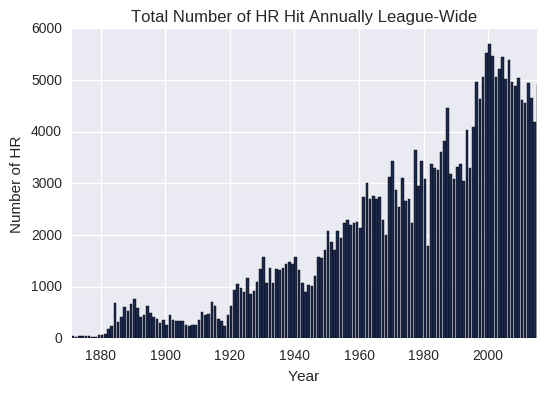

In [6]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = range(1871,2016)
y = total_HR_each_year

plt.bar(x, y, color = '#1d2a4f')

plt.title('Total Number of HR Hit Annually League-Wide')
plt.xlabel('Year')
plt.ylabel('Number of HR')
plt.xlim(1871, 2015)
plt.ylim(0, 6000)

### Thoughts on example exploration:

The total number of HR hit annually league-wide has clearly increased over time. How has the max number of HRs changed over time? Does it follow a similar pattern?

# Question 1: What was the highest number of HRs hit across both leagues in each year?

To determine this, I will group the Batting.csv data by year, find the .max() value for each year, and then plot vs year.

In [7]:
max_HR_by_year = batting_group_year.max()['HR']

In [8]:
years = batting_df['yearID'].drop_duplicates()

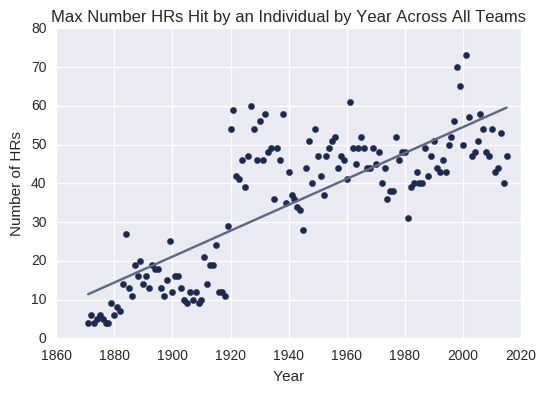

In [9]:
%matplotlib inline

x = years
y = max_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Max HRs')

plt.title('Max Number HRs Hit by an Individual by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 80)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion Part 1-1

The annual high in number of HRs hit by a single individual has risen dramatically since the beginning of baseball. The 'Steroid Era' is thought to correspond to the late 1980's through early 2000's which appears to correlate with a peak in these data, or at least the three highest data points. Of course, correlation does not necessarily equate to causation, but in this case I would not be surprised if it did.

Another way to look at this would be to graph the league-wide average over time:

In [10]:
average_HR_by_year = batting_group_year.mean()['HR']

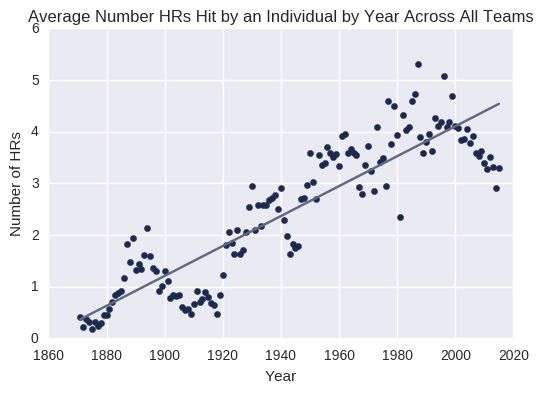

In [11]:
%matplotlib inline

x = years
y = average_HR_by_year

plt.scatter(x, y, color = '#1d2a4f', label='Average HRs')

plt.title('Average Number HRs Hit by an Individual by Year Across All Teams')
plt.xlabel('Year')
plt.ylabel('Number of HRs')
plt.xlim(1860, 2020)
plt.ylim(0, 6)

# add trendline

m, b = np.polyfit(x, y, 1)

plt.plot(x, y, '.', color = '#1d2a4f')
plt.plot(x, m*x + b, '-', color = '#606983')

### Results and Discussion Part 1-2

The increase over time is also apparent when looking at the average number of HRs hit by year.

I was surprised that the average was so low, but closer inspection of the data showed that there were many players who don't hit any in a given year (not shown).

One limitation of this analysis is that way that baseball has changed over time. Pre-1920's baseball ('The Dead Ball Era', https://en.wikipedia.org/wiki/Dead-ball_era) was characterized by low scoring games and a lack of homeruns in part because of several factors including the sheer size of the ballparks and changes to a rule that originally designated a ball hit out that landed foul as a foul ball.

In any case, this analysis made me wonder who hit the most HR in a single year:

In [12]:
just_players_and_HR = batting_df.loc[:,['yearID', 'playerID', 'HR']]

just_players_and_HR.max()['HR']

73.0

In [13]:
# now I know 73 was the highest number hit, and my first graph tells me this occurred in 2001...

year_2001_only = just_players_and_HR[just_players_and_HR.yearID == 2001]

In [14]:
year_2001_high = year_2001_only[year_2001_only.HR == 73]

year_2001_high

,yearID,playerID,HR
80750,2001,bondsba01,73.0


### Results and Discussion Part 1-3

Highest number of HRs hit by an individual in one year was by Barry Bonds who hit 73 in 2001. This isn't a surprising result (i.e. of course it was Barry Bonds!), but it was easy to verify via Google and it was nice to see that I got the right answer.

# Question 2: Does the batting data differ between the two leagues since the DH was implemented (1973-present)? More specifically, have AL teams scored more runs than NL teams?

"In baseball, the designated hitter rule is the common name for Major League Baseball Rule 5.11, adopted by the American League in 1973. The rule allows teams to have one player, known as the designated hitter (abbreviated DH), to bat in place of the pitcher."

Source: https://en.wikipedia.org/wiki/Designated_hitter

To attempt to answer this, I will first remove any batting data prior to 1973 from my batting_df and then split the remaining data into AL vs NL. Then I will take each and .groupby() year and find the total number of runs scored league-wide and graph this vs year.

In [15]:
DH_implemented = 1973 # DH = designated hitter
batting_since_DH = batting_df[batting_df.yearID >= DH_implemented]

In [16]:
AL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'AL']

In [17]:
NL_batting_since_DH = batting_since_DH[batting_since_DH.lgID == 'NL']

In [18]:
AL_batting_since_DH_tot_runs_by_year = AL_batting_since_DH.groupby('yearID').sum()['R']

In [19]:
NL_batting_since_DH_tot_runs_by_year = NL_batting_since_DH.groupby('yearID').sum()['R']

In [20]:
DH_years = batting_since_DH['yearID'].drop_duplicates()

(1970, 2020)

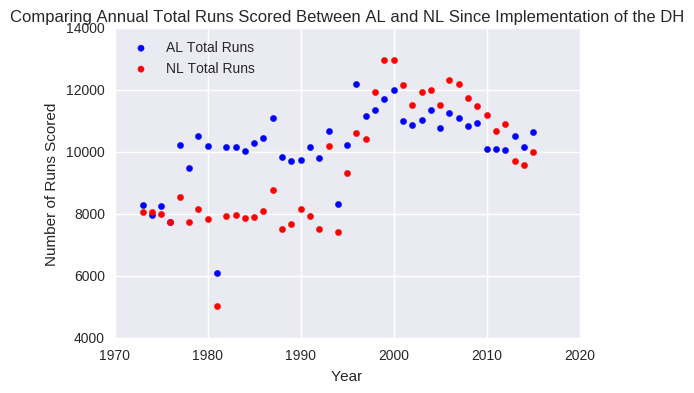

In [21]:
%matplotlib inline

x = DH_years
y1 = AL_batting_since_DH_tot_runs_by_year
y3 = NL_batting_since_DH_tot_runs_by_year

plt.scatter(x, y1, color = 'blue', label='AL Total Runs')
plt.scatter(x, y3, color = 'red', label='NL Total Runs')

plt.title('Comparing Annual Total Runs Scored Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper left')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

### Results and Discussion Part 2-1

Looking at the total number of runs by year shows that, at first, AL teams did score more total runs than NL teams. However, the difference is almost negligible in more recent years.

The especially low number of runs scored in both leagues in 1981 corresponds to the 1981 strike which resulted in the cancellation of 713 games, or 38% of the season.

Source: https://en.wikipedia.org/wiki/1981_Major_League_Baseball_strike

What if you look at the average number of runs scored by an individual each year...

In [22]:
AL_batting_since_DH_mean_runs_by_year = AL_batting_since_DH.groupby('yearID').mean()['R']

In [23]:
NL_batting_since_DH_mean_runs_by_year = NL_batting_since_DH.groupby('yearID').mean()['R']

(1970, 2020)

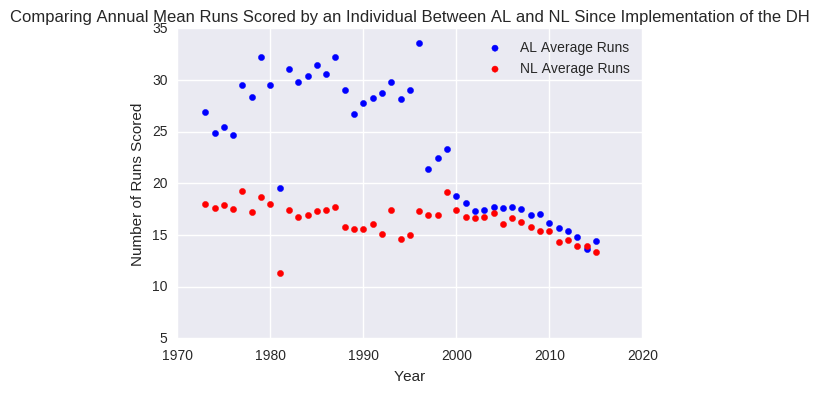

In [24]:
%matplotlib inline

x = DH_years
y2 = AL_batting_since_DH_mean_runs_by_year
y4 = NL_batting_since_DH_mean_runs_by_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Annual Mean Runs Scored by an Individual Between AL and NL Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)

### Results and Discussion Part 2-2

Looking at the mean number of runs by year shows is equally as dramatic early on, but, again, shows that the difference is almost non-existent since ~2000. 

What if you look at the average number of runs scored by a team each year...

In [25]:
NL_batting_since_DH_by_year_and_team = NL_batting_since_DH.groupby(['yearID','teamID'])

In [26]:
NL_tot_runs_per_team = NL_batting_since_DH_by_year_and_team.sum()['R']

In [27]:
def find_mean_by_series_index(series_name, index_start, index_end):
    """
    Purpose: 
      Takes in a Series and averages all values with the same index.
      Calling .mean() on the Series returns the mean of all values and this is not what I want.
    Input:
      series_name = the Series to be averaged
      index_start = the index to start with (e.x. year)
      index_end = the index to end with (e.x. year)
    Output: 
      A list where each value is an average for each index in the parent Series
    """
    start = index_start
    list_of_averages = []
    while start <= index_end:
        index_average = series_name[start].mean()
        start += 1
        list_of_averages.append(index_average)
    return list_of_averages

In [28]:
NL_avg_runs_per_year = find_mean_by_series_index(NL_tot_runs_per_team, 1973, 2015)

In [29]:
AL_batting_since_DH_by_year_and_team = AL_batting_since_DH.groupby(['yearID','teamID'])

In [30]:
AL_tot_runs_per_team = AL_batting_since_DH_by_year_and_team.sum()['R']

In [31]:
AL_avg_runs_per_year = find_mean_by_series_index(AL_tot_runs_per_team, 1973, 2015)

(1970, 2020)

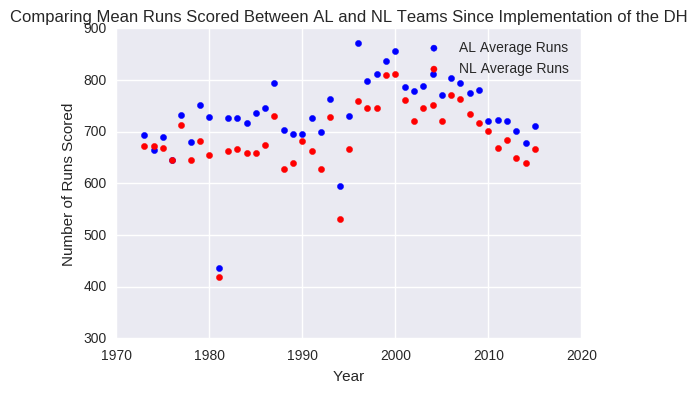

In [32]:
%matplotlib inline

x = DH_years
y2 = AL_avg_runs_per_year
y4 = NL_avg_runs_per_year

plt.scatter(x, y2, color = 'blue', label='AL Average Runs')

plt.scatter(x, y4, color = 'red', label='NL Average Runs')

plt.title('Comparing Mean Runs Scored Between AL and NL Teams Since Implementation of the DH')
plt.xlabel('Year')
plt.ylabel('Number of Runs Scored')
plt.legend(loc='upper right')
plt.xlim(1970, 2020)
# plt.ylim(0, 80)

### Results and Discussion Part 2-3

When you compare mean runs scored by a team as a whole, the difference is significantly less dramatic. However, in most cases, according to this graph, AL teams still scored more runs than NL teams. Of the three analyses shown, this one is probably best for answering the original question I posed (i.e. Do AL teams score more runs than NL teams?).

One limitation of this analysis is that I did not take into account the number of runs contributed by DHs. Perhaps AL position players are better hitters on average than NL position players. I also failed to look at how the number of runs differed between the two leagues before the DH was implemented. If runs scored by DHs were subtracted, would the apparent difference still exist?

Another limitation is that there are more differences between the AL and NL than just the designated hitter, including size of ballpark, and that therefore the differences observed can not be explained by the implementation of the DH alone.

It is important to note that any observed relationship does not imply causation. AL teams appear to score more runs than NL teams since the DH was implemented, however, there could be other factors at play. 

# Question 3: Since the implementation of the DH, are NL pitchers better hitters than AL pitchers?

You might expect that when building a NL team, one might look for pitchers who can hit and that AL teams really wouldn't care one way or the other. It might be easiest to analyse this by looking at Hits per At Bat (H/AB) or even Runs Batted In per At Bat (RBI/AB).

To answer this, I need to get position data from Fielding.csv and merge this info with the batting data, retaining only info for pitchers. Then I can create a DataFram from NL data and another for AL data and use it to calculate H/AB and RBI/AB for each.

In [33]:
fielding_df = pd.read_csv('baseball/core/Fielding.csv')

fielding_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170526 entries, 0 to 170525
Data columns (total 18 columns):
playerID    170526 non-null object
yearID      170526 non-null int64
stint       170526 non-null int64
teamID      170526 non-null object
lgID        169023 non-null object
POS         170526 non-null object
G           170526 non-null int64
GS          75849 non-null float64
InnOuts     102313 non-null float64
PO          156409 non-null float64
A           156408 non-null float64
E           156407 non-null float64
DP          156408 non-null float64
PB          11116 non-null float64
WP          4189 non-null float64
SB          6024 non-null float64
CS          6024 non-null float64
ZR          4189 non-null float64
dtypes: float64(11), int64(3), object(4)
memory usage: 23.4+ MB


### Fielding.csv / fielding_df Data Wrangling

Once again, there are data missing here and some of it is easy to explain. For example, several of the stats only apply to catchers and wouldn't be calculated for other position players.

In any case, I'm only interested in the POS (player position) data from this table which is complete and therefore I will ignore any missing data.

The last bit of data wrangling for this question involves merging the player position data from fielding_df with batting data since implementation from the DH. When I do this I retain only pitcher batting data because I'm only interested in comparing pitchers between the two leagues (AL and NL).

In [34]:
pitcher_fielding = fielding_df[fielding_df.POS == 'P']

In [35]:
pitcher_fielding_since_DH = pitcher_fielding[pitcher_fielding.yearID >= DH_implemented]

In [36]:
just_pitcher_pos_data = pitcher_fielding_since_DH.loc[:,['playerID', 'POS']]

In [37]:
pitcher_batting_since_DH = just_pitcher_pos_data.merge(batting_since_DH, on = 'playerID', how = 'outer')

In [38]:
NL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'NL']

In [39]:
AL_pitcher_batting_since_DH = pitcher_batting_since_DH[pitcher_batting_since_DH.lgID == 'AL']

In [40]:
NL_hits_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'H'] / NL_pitcher_batting_since_DH.loc[:,'AB']

NL_hits_per_at_bat_no_NaN = NL_hits_per_at_bat.dropna()

NL_hits_per_at_bat_no_NaN.describe()

count    104569.000000
mean          0.145189
std           0.149439
min           0.000000
25%           0.000000
50%           0.131579
75%           0.214286
max           1.000000
dtype: float64

In [41]:
AL_hits_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'H'] / AL_pitcher_batting_since_DH.loc[:,'AB']

AL_hits_per_at_bat_no_NaN = AL_hits_per_at_bat.dropna()

AL_hits_per_at_bat_no_NaN.describe()

count    33560.000000
mean         0.165535
std          0.183795
min          0.000000
25%          0.000000
50%          0.183216
75%          0.266075
max          1.000000
dtype: float64

In [42]:
from scipy import stats

stats.ttest_ind(NL_hits_per_at_bat_no_NaN, AL_hits_per_at_bat_no_NaN)

Ttest_indResult(statistic=-20.464599497937375, pvalue=6.1224161595912477e-93)

In [43]:
NL_HR_per_at_bat = NL_pitcher_batting_since_DH.loc[:,'HR'] / NL_pitcher_batting_since_DH.loc[:,'AB']

NL_HR_per_at_bat_no_NaN = NL_HR_per_at_bat.dropna()

NL_HR_per_at_bat_no_NaN.describe()

count    104569.000000
mean          0.006018
std           0.026355
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
dtype: float64

In [44]:
AL_HR_per_at_bat = AL_pitcher_batting_since_DH.loc[:,'HR'] / AL_pitcher_batting_since_DH.loc[:,'AB']

AL_HR_per_at_bat_no_NaN = AL_HR_per_at_bat.dropna()

AL_HR_per_at_bat_no_NaN.describe()

count    33560.000000
mean         0.011713
std          0.040564
min          0.000000
25%          0.000000
50%          0.000000
75%          0.012605
max          1.000000
dtype: float64

In [45]:
from scipy import stats

stats.ttest_ind(NL_HR_per_at_bat_no_NaN, AL_HR_per_at_bat_no_NaN)

Ttest_indResult(statistic=-29.833589038504943, pvalue=5.9947984429123303e-195)

In [46]:
NL_pitcher_batting_since_DH.loc[:,'AB'].sum()

5486828.0

In [47]:
AL_pitcher_batting_since_DH.loc[:,'AB'].sum()

3373237.0

### Results and Discussion Part 3

According to my analysis, AL pitchers average more hits per at bat (0.166 vs 0.145) although the standard deviation is larger for AL vs NL (0.184 vs 0.149). A standard t-test indicates that these values are statistically different (p-value=6.12 X 10^-93).

AL pitchers also average nearly twice as many homeruns per at bat (0.0117 vs 0.0060) than NL pitchers although, relative to these values, the standard devations are quite large (0.0406 vs 0.0264). A standard t-test indicates that these values are also statistically different (p-value = 5.99 x 10^-195).

One limitation to this analysis is that there are several assumptions made when conducting a t-test including that the data has a normal distribution and that the two datasets have similar standard deviations (among others). In the case of the HR/AB comparison, the standard deviations are especially different which indicates that the results of this analysis could be misleading or even incorrect.

Other limitations include the fact that AL pitchers have significantly fewer total at bats and (3.37 million vs 5.49 million since DH implemented) and, as mentioned earlier, that AL ballparks are often more hitter-friendly than NL ballparks.

In any case, I found these results to be very surprising and not at all what I expected.

# Question 4: Does a team's payroll correlate with their win record? 

To attempt to answer this question, I looked at data from the SF Giants and LA Dodgers over the last 30 years (1985-2015).

First, find the .sum() of their salaries for each year, then compare this to the win record (games won / games played) for each year.

In [48]:
salaries_df = pd.read_csv('baseball/core/Salaries.csv')

salaries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25575 entries, 0 to 25574
Data columns (total 5 columns):
yearID      25575 non-null int64
teamID      25575 non-null object
lgID        25575 non-null object
playerID    25575 non-null object
salary      25575 non-null int64
dtypes: int64(2), object(3)
memory usage: 999.1+ KB


In [49]:
print salaries_df.head()
print salaries_df.tail()

   yearID teamID lgID   playerID  salary
0    1985    ATL   NL  barkele01  870000
1    1985    ATL   NL  bedrost01  550000
2    1985    ATL   NL  benedbr01  545000
3    1985    ATL   NL   campri01  633333
4    1985    ATL   NL  ceronri01  625000
       yearID teamID lgID   playerID    salary
25570    2015    WAS   NL  treinbl01    512800
25571    2015    WAS   NL  ugglada01    507500
25572    2015    WAS   NL  werthja01  21000000
25573    2015    WAS   NL  zimmejo02  16500000
25574    2015    WAS   NL  zimmery01  14000000


### Salaries.csv / salaries_df Data Wrangling

There are no missing data in this file, however the data is limited to 1985 through 2015. Therefore I must limit my comparison between payroll and win record to these years.

In [50]:
# need annual record data from Teams table
teams_df = pd.read_csv('baseball/core/Teams.csv')

teams_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805 entries, 0 to 2804
Data columns (total 48 columns):
yearID            2805 non-null int64
lgID              2755 non-null object
teamID            2805 non-null object
franchID          2805 non-null object
divID             1288 non-null object
Rank              2805 non-null int64
G                 2805 non-null int64
Ghome             2406 non-null float64
W                 2805 non-null int64
L                 2805 non-null int64
DivWin            1260 non-null object
WCWin             624 non-null object
LgWin             2777 non-null object
WSWin             2448 non-null object
R                 2805 non-null int64
AB                2805 non-null int64
H                 2805 non-null int64
2B                2805 non-null int64
3B                2805 non-null int64
HR                2805 non-null int64
BB                2805 non-null int64
SO                2685 non-null float64
SB                2661 non-null float64
CS    

### Teams.csv / teams_df Data Wrangling

I am only interested in the 'teamID', 'W', and 'G' columns of this data, all of which are complete, therefore no further data wrangling is required here.

In [51]:
SFN_salaries = salaries_df[salaries_df.teamID == 'SFN']

In [52]:
LAN_salaries = salaries_df[salaries_df.teamID == 'LAN']

In [53]:
SFN_payroll_by_year = SFN_salaries.groupby('yearID').sum()

In [54]:
LAN_payroll_by_year = LAN_salaries.groupby('yearID').sum()

In [55]:
SFN_teams = teams_df[teams_df.teamID == 'SFN']

In [56]:
SFN_teams_since_1985 = SFN_teams[SFN_teams.yearID >= 1985]

In [57]:
SFN_record_since_1985 = SFN_teams_since_1985['W'] / SFN_teams_since_1985['G']

In [58]:
LAN_teams = teams_df[teams_df.teamID == 'LAN']

In [59]:
LAN_teams_since_1985 = LAN_teams[LAN_teams.yearID >= 1985]

In [60]:
LAN_record_since_1985 = LAN_teams_since_1985['W'] / LAN_teams_since_1985['G']

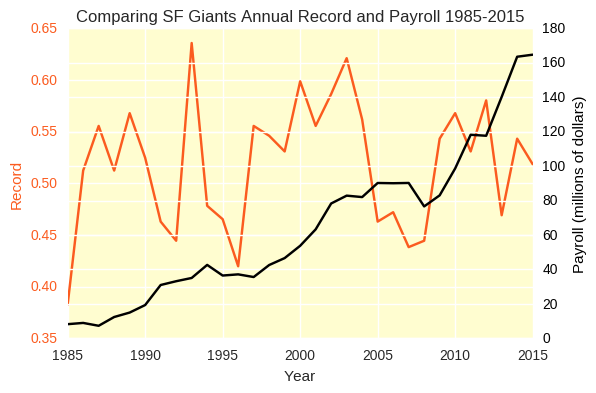

In [61]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'

"""
This graph was generated with help from the following pages:

http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/san-francisco-giants-color-codes/
"""

fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = SFN_record_since_1985
ax1.plot(x, y1, '#FB5B1F')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#FB5B1F')
for tl in ax1.get_yticklabels():
    tl.set_color('#FB5B1F')

ax2 = ax1.twinx()
y2 = (SFN_payroll_by_year / 1000000)
ax2.plot(x, y2, 'k')
ax2.set_ylabel('Payroll (millions of dollars)', color='k')
for tl in ax2.get_yticklabels():
    tl.set_color('k')
plt.title('Comparing SF Giants Annual Record and Payroll 1985-2015')
plt.show()

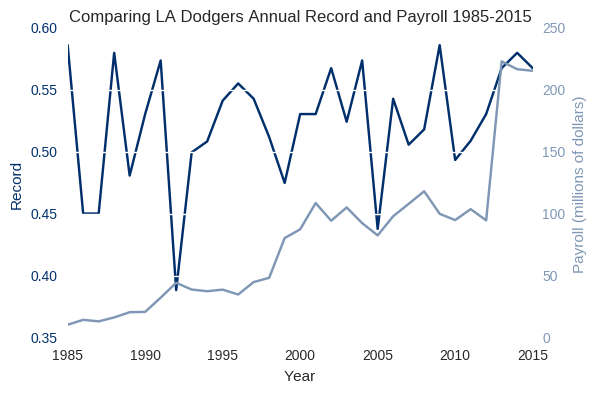

In [62]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFFFF'

"""
This graph was generated with help from the following pages:

http://matplotlib.org/examples/api/two_scales.html
http://stackoverflow.com/questions/14088687/how-to-change-plot-background-color
http://teamcolorcodes.com/los-angeles-dodgers-color-codes/
http://www.color-hex.com/color/002f6c
"""

fig, ax1 = plt.subplots()

x = range(1985, 2016)
y1 = LAN_record_since_1985
ax1.plot(x, y1, '#002F6C')
ax1.set_xlabel('Year')
# Make the y-axis label and tick labels match the line color.
ax1.set_ylabel('Record', color='#002F6C')
for tl in ax1.get_yticklabels():
    tl.set_color('#002F6C')


ax2 = ax1.twinx()
y2 = (LAN_payroll_by_year / 1000000)
ax2.plot(x, y2, '#7f97b5')
ax2.set_ylabel('Payroll (millions of dollars)', color='#7f97b5')
for tl in ax2.get_yticklabels():
    tl.set_color('#7f97b5')
plt.title('Comparing LA Dodgers Annual Record and Payroll 1985-2015')
plt.show()

### Results and Discussion Part 4

According to my analysis, there doesn't appear to be a relationship between payroll and win record (Win/Games played) for these two teams.

One obvious limitation to this particular analysis is that I only looked at two teams. Perhaps looking at every team over time or the teams with the highest win records would be a more useful way to answer this question.

Another limitation is that fact that, unlike team payrolls, win records can't continually increase. Looking more closely at the graph for the Dodgers, it is interesting to see three local salary maxima between 2000-2010 are followed closely, if not immediately, by local maxima in win record (as well as a local minimum corresponding to a severe drop in win record!). This could imply a correlative relationship in these particular years, however, it is not a consistent one and similar alignments between local maxima are not as apparent in the Giants' data.

It is interesting, however, to see the staggering increase in payroll for both teams, especially in recent years!

# Question 5: How many SF Giants players have appeared in each All Star Game since the team moved to San Francisco?

To answer this simple question, I used AllstarFall.csv and removed any players not on the Giants, then grouped remaining data by year and counted the number of records for each year.

In [63]:
allstar_df = pd.read_csv('baseball/core/AllstarFull.csv')

allstar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5069 entries, 0 to 5068
Data columns (total 8 columns):
playerID       5069 non-null object
yearID         5069 non-null int64
gameNum        5069 non-null int64
gameID         5020 non-null object
teamID         5069 non-null object
lgID           5069 non-null object
GP             5050 non-null float64
startingPos    1580 non-null float64
dtypes: float64(2), int64(2), object(4)
memory usage: 316.9+ KB


### AllstarFull.csv / allstar_df Data Wrangling

I am only interested in 'teamID' and 'yearID' columns, both of which are complete, therefore no further data wrangling is required.

In [64]:
giants_allstar_appearances = allstar_df[allstar_df.teamID == 'SFN']

In [65]:
giants_allstar_appearances_by_year = giants_allstar_appearances.groupby('yearID').count()

(0, 10)

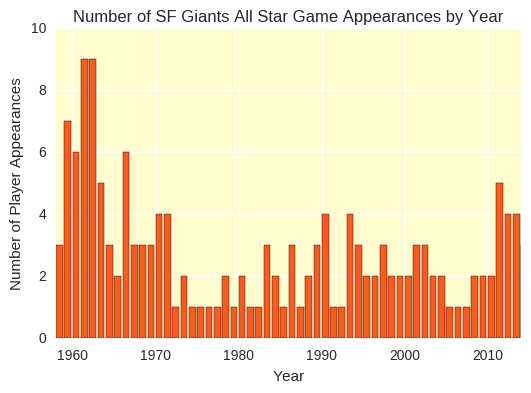

In [66]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['axes.facecolor'] = '#FFFDD0'
%matplotlib inline

x = range(1958,2015)
y = giants_allstar_appearances_by_year['playerID']

plt.bar(x, y, color = '#FB5B1F', label='AL Average Runs')

plt.title('Number of SF Giants All Star Game Appearances by Year')
plt.xlabel('Year')
plt.ylabel('Number of Player Appearances')
plt.xlim(1958, 2014)
plt.ylim(0, 10)

### Results and Discussion Part 5

The graph shows that since 1958, each NL All Star team has had at least one player from the Giants. The peak was 9 players in 1961 and 1962.

A follow up question that might be worth investigating is whether or not there are any teams that have not been represented by their league's All Star team.

This is probably the single most straightforward question that I addressed here and I can't think of any limitation to this particular analysis.